In [1]:
%matplotlib inline
import import_ipynb
import NeuralNet_FromScratch as nnfs_module
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import style
from nnfs.datasets import spiral_data
from nnfs.datasets import sine_data
from zipfile import ZipFile
import nnfs
import os
import urllib
import urllib.request
import cv2

style.use("dark_background")

# Retreive Dataset

In [2]:
URL = 'https://nnfs.io/datasets/fashion_mnist_images.zip'
FILE = 'fashion_mnist_images.zip'
FOLDER = 'fashion_mnist_images'

if not os.path.isfile(FILE):
    print(f'Downloading {URL} and saving as {FILE}...')
    urllib.request.urlretrieve(URL, FILE)

if not os.path.isdir(FOLDER):
    print("Unzipping images ...")
    with ZipFile(FILE) as zip_images:
        zip_images.extractall(FOLDER)
    print('DONE')
    
print("Date preparation is complete.")

Date preparation is complete.


# Fashion MNIST Classifications
0: T-shirt / top

1: Trouser

2: Pullover

3: Dress

4: Coat

5: Sandal

6: Shirt

7: Sneaker

8: Bag

9: Ankle Boot

In [3]:
fashion_mnist_labels = {
    0:'T-shirt / top',
    1:'Trouser',
    2:'Pullover',
    3:'Dress',
    4:'Coat',
    5:'Sandal',
    6:'Shirt',
    7:'Sneaker',
    8:'Bag',
    9:'Ankle Boot'
}

# Data Loading Function

In [4]:
def load_mnist_dataset(dataset, path):
    
    #scan all directories and create list of labels
    labels = os.listdir(os.path.join(path, dataset))
    
    #create lists for samples and labels
    X = []
    y = []
    
    #for each label folder
    for label in labels:
        #for each image in the given folder
        for file in os.listdir(os.path.join(path, dataset, label)):
            #read the image
            image = cv2.imread(os.path.join(\
                                path, dataset, label, file),\
                               cv2.IMREAD_UNCHANGED)
            
            #append image to x and label to y
            X.append(image)
            y.append(label)
            
    #convert data structure to numpy arrays and return
    return np.array(X), np.array(y).astype('uint8')

# Create MNIST Train & Test Datasets

In [5]:
def create_data_mnist(path):
    
    #load both sets
    X, y = load_mnist_dataset('train', path)
    X_test, y_test = load_mnist_dataset('test', path)
    
    #return all datasets
    return X, y, X_test, y_test

# Generate Train and Test Sets

In [6]:
X, y, X_test, y_test = create_data_mnist(FOLDER)
print(len(X))
print(len(y))
print(len(X_test))
print(len(y_test))

60000
60000
10000
10000


# Data Preprocessing

## Scale features
range from -1 to 1

In [7]:
X = (X.astype(np.float32) - 127.5) / 127.5
X_test = (X_test.astype(np.float32) - 127.5) / 127.5

print(X.min(), X.max())
print(X.shape)

-1.0 1.0
(60000, 28, 28)


## Reshape Data
From 3D to 2D by flattening image data from 28x28 to 1x784

In [8]:
X = X.reshape(X.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

print(X.shape)
print(X_test.shape)

(60000, 784)
(10000, 784)


## Shuffle Samples

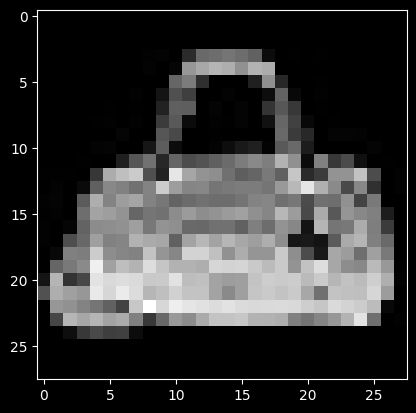

8


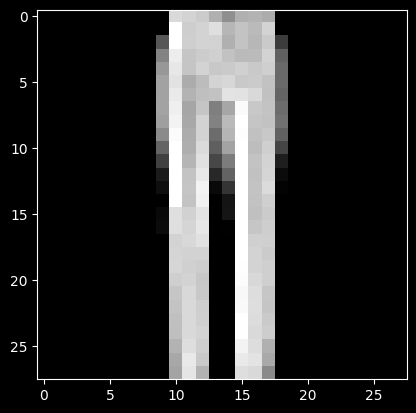

1


In [9]:
keys = np.array(range(X.shape[0])) #number of indices in samples
np.random.shuffle(keys) #shuffle indices

#grab by indice and assign to array
X = X[keys]
y = y[keys]

#test shuffling
plt.imshow(X[8].reshape(28,28), cmap='gray') #reshape back to a matrix for veiwing
plt.show()
print(y[8])

plt.imshow(X[999].reshape(28,28), cmap='gray') #reshape back to a matrix for veiwing
plt.show()
print(y[999])

In [11]:
#instantiate the model
model = nnfs_module.Model()

#add layers
model.add(nnfs_module.Layer_Dense(X.shape[1], 32)) #dense layer 1 with 32 neurons
model.add(nnfs_module.ReLU_Activation()) #ReLU used for activation
model.add(nnfs_module.Layer_Dense(32,32)) #dense layer 2 with 32 neurons
model.add(nnfs_module.ReLU_Activation())
model.add(nnfs_module.Layer_Dense(32,10)) #dense layer 3 with 10 neurons
model.add(nnfs_module.Activation_Softmax()) #output layer using Softmax for categorical classification

#set loss, optimizer and accuracy objects
model.set(\
         loss=nnfs_module.Loss_CategoricalCrossEntropy(),\
         optimizer=nnfs_module.Optimizer_Adam(decay=1e-3),\
         accuracy=nnfs_module.Accuracy_Categorical())

#finalize the model
model.finalize()

#train the model
model.train(X, y, validation_data=(X_test, y_test),\
           epochs=5, batch_size=128, print_every=100)

model.save('fashion_mnist_2.model')

model.save_train_dict('train_dict.pkl')

epoch: 1
step: 0, acc: 0.141, loss: 2.321 (data_loss: 2.321, reg_loss: 0.000000), lr: 0.001
step: 100, acc: 0.719, loss: 0.629 (data_loss: 0.629, reg_loss: 0.000000), lr: 0.0009090909090909091
step: 200, acc: 0.797, loss: 0.570 (data_loss: 0.570, reg_loss: 0.000000), lr: 0.0008333333333333334
step: 300, acc: 0.836, loss: 0.472 (data_loss: 0.472, reg_loss: 0.000000), lr: 0.0007692307692307692
step: 400, acc: 0.805, loss: 0.533 (data_loss: 0.533, reg_loss: 0.000000), lr: 0.0007142857142857143
step: 468, acc: 0.802, loss: 0.518 (data_loss: 0.518, reg_loss: 0.000000), lr: 0.000681198910081744
epoch: 2
step: 0, acc: 0.812, loss: 0.494 (data_loss: 0.494, reg_loss: 0.000000), lr: 0.0006807351940095304
step: 100, acc: 0.844, loss: 0.454 (data_loss: 0.454, reg_loss: 0.000000), lr: 0.0006373486297004461
step: 200, acc: 0.836, loss: 0.429 (data_loss: 0.429, reg_loss: 0.000000), lr: 0.0005991611743559018
step: 300, acc: 0.852, loss: 0.401 (data_loss: 0.401, reg_loss: 0.000000), lr: 0.0005652911249

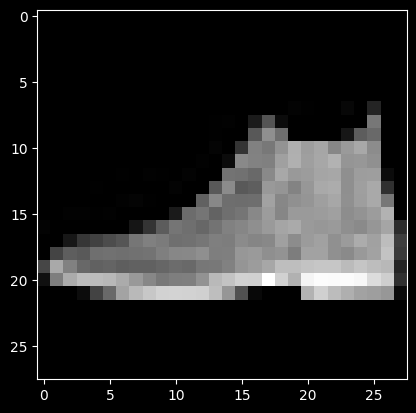

In [13]:
plt.imshow(X_test[0].reshape(28,28), cmap='gray')

In [14]:
print(model.predict(X_test[0]))

[[6.18640695e-06 2.73413929e-05 2.39709513e-06 8.39532305e-07
  1.31996934e-05 5.70825668e-02 6.34951730e-06 1.41483864e-01
  2.12272021e-03 7.99254536e-01]]


In [17]:
print(np.argmax(model.predict(X_test[0])))
print(y_test[0])

9
9


In [18]:
for layer in model.layers:
    print(layer.output)

[[ 6.15875271  5.77980266 -5.39537482  9.16068722  9.6156052   7.65536705
  -5.70918488  4.2908187   9.84482578  8.67702765  8.97241165 10.64015961
   1.19326066  6.13429132 -2.80762708  5.77679467  0.76183625  0.23287973
   7.47208449 -5.95556392  4.75176369  1.17790164 -1.49255051  3.17263417
   8.37587957 12.33679092  0.92400456  4.76859654  8.49541475  8.89462336
   0.13898645  1.5803669 ]]
[[ 6.15875271  5.77980266  0.          9.16068722  9.6156052   7.65536705
   0.          4.2908187   9.84482578  8.67702765  8.97241165 10.64015961
   1.19326066  6.13429132  0.          5.77679467  0.76183625  0.23287973
   7.47208449  0.          4.75176369  1.17790164  0.          3.17263417
   8.37587957 12.33679092  0.92400456  4.76859654  8.49541475  8.89462336
   0.13898645  1.5803669 ]]
[[ 1.86441711 -0.42185391  5.96778243  2.514482    0.97657889  9.31522925
   0.76597318 -1.23367915 -4.56084101 -4.38468825 -3.80660218 -6.8135709
   1.27276366  0.83787393  0.63881338 -2.53181354  0.2158

In [26]:
def visualize_layers(sample_num, fig):
    input_data = X_test[sample_num]
    output_truth = y_test[sample_num]
    prediction = model.predict(input_data)
    
    pred_class = np.argmax(prediction)
    
    if pred_class == output_truth:
        title_text = f"Correct! Prediction {pred_class}, Truth {output_truth}"
        fig.suptitle(title_text, fontsize=20, color="g")
    else:
        title_text = f"Wrong! Prediction {pred_class}, Truth {output_truth}"
        fig.suptitle(title_text, fontsize=20, color="r")
        
    #Generate Axes#
    #axis for sample
    ax0 = plt.subplot2grid((1,7), (0,0), rowspan=1, colspan=1)
    #axes for the layers
    #TODO: loop layers for count and generate axes
    ax1 = plt.subplot2grid((1,7), (0,1), rowspan=1, colspan=1)
    ax2 = plt.subplot2grid((1,7), (0,2), rowspan=1, colspan=1)
    ax3 = plt.subplot2grid((1,7), (0,3), rowspan=1, colspan=1)
    ax4 = plt.subplot2grid((1,7), (0,4), rowspan=1, colspan=1)
    ax5 = plt.subplot2grid((1,7), (0,5), rowspan=1, colspan=1)
    ax6 = plt.subplot2grid((1,7), (0,6), rowspan=1, colspan=1)
    
    
    #Gather axis data from layer outputs#
    #output is a vector
    #rotate to display vertically
    #rotates counterclockwise
    #TODO: check layer dimensions
    layer_1 = np.rot90(model.layers[0].output, k=3, axes=(0,1))
    layer_1_activated = np.rot90(model.layers[1].output, k=3, axes=(0,1))
    
    layer_2 = np.rot90(model.layers[2].output, k=3, axes=(0,1))
    layer_2_activated = np.rot90(model.layers[3].output, k=3, axes=(0,1))
    
    layer_3 = np.rot90(model.layers[4].output, k=3, axes=(0,1))
    layer_3_activated = np.rot90(model.layers[5].output, k=3, axes=(0,1))
    
    
    #Display data#
    #display sample
    ax0.imshow(input_data.reshape(28,28), cmap='gray')
    #display layer outputs
    #TODO: check layer max, min
    ax1.imshow(layer_1, cmap='RdYlGn')
    ax2.imshow(layer_1_activated, cmap='YlGn')
    
    ax3.imshow(layer_2, cmap='RdYlGn')
    ax4.imshow(layer_2_activated, cmap='YlGn')
    
    ax5.imshow(layer_3, cmap='RdYlGn')
    ax6.imshow(layer_3_activated, cmap='YlGn')
    
    ax0.axis("off")
    
    #set titles
    #TODO: do in a loop
    ax1.set_title("L1")
    ax2.set_title("L1_activated")
    ax3.set_title("L2")
    ax4.set_title("L2_activated")
    ax5.set_title("L3")
    ax6.set_title("L3_activated")
    
    plt.show()
    

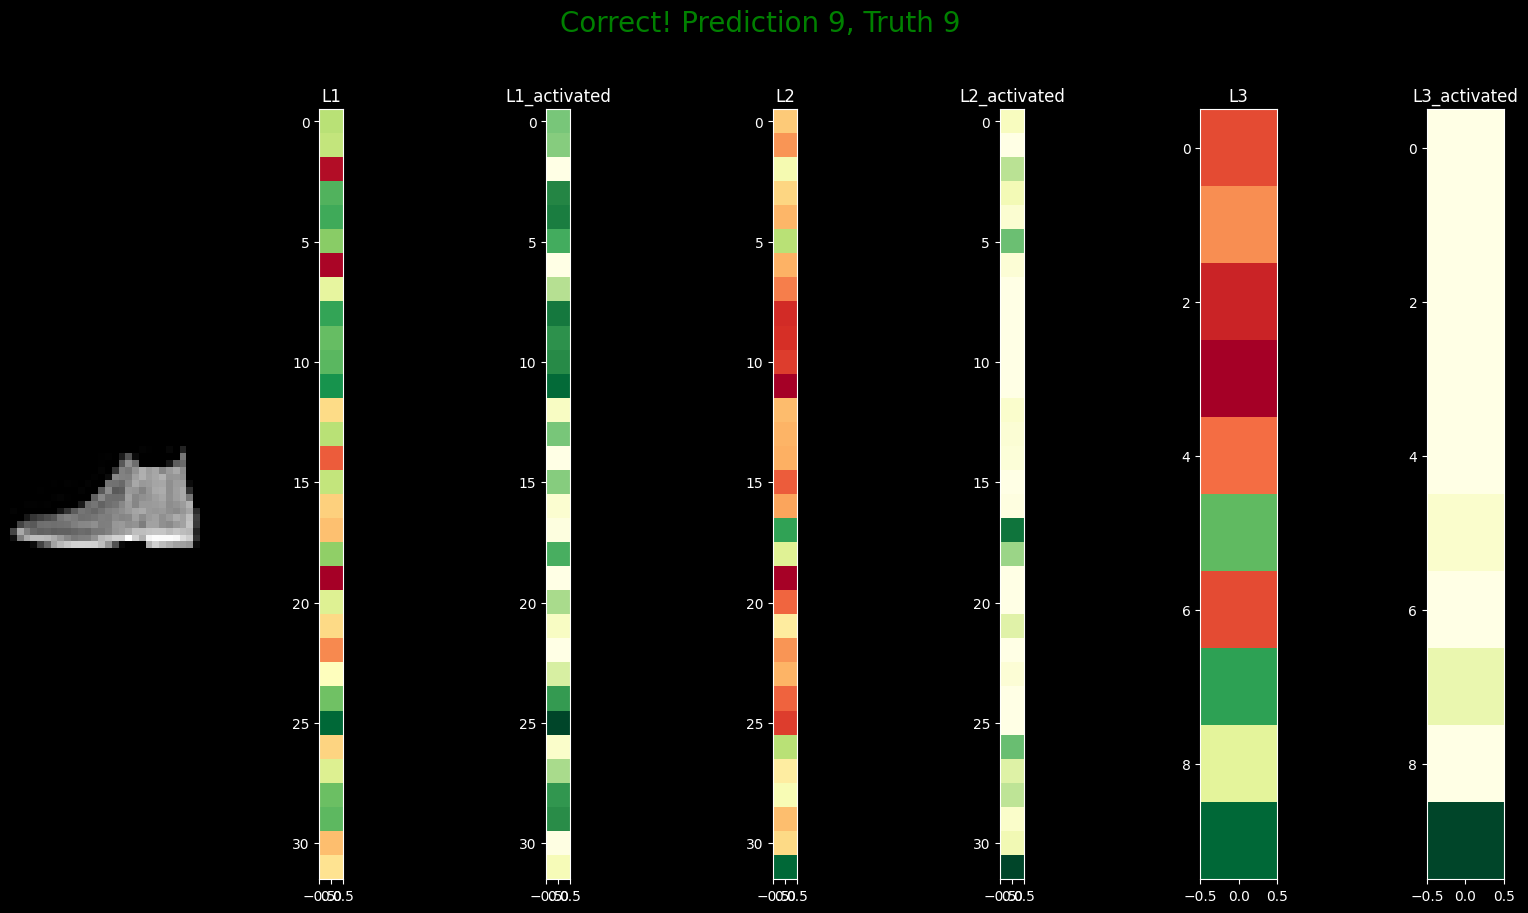

In [27]:
fig = plt.figure(figsize=(20,10))
visualize_layers(0, fig)

# Save Sample figure animations
These animations are for each sample and display the outputs from each layer

In [30]:
%matplotlib tk
from matplotlib import animation

LIMIT = 1000

dir_name = "layer_outs"

if not os.path.exists(dir_name):
    os.makedirs(dir_name)
    
fig = plt.figure(figsize=(12,12))

def animate(i):
    fig.clear()
    visualize_layers(i, fig)
    plt.savefig(f'{dir_name}/{y_test[i]}-{i}.png')

anim = animation.FuncAnimation(fig, animate, frames=LIMIT)
plt.show()

In [ ]:
from tqdm import tqdm

layer_data_by_class = {}